[Titan Image Generator G1 - Request and response format](https://docs.aws.amazon.com/bedrock/latest/userguide/model-parameters-titan-image.html)

In [1]:
from utils import encode_image_base64_from_file, display_image
from params import *
from generator import gen_image

image_params = ImageParams()

## Text to Image


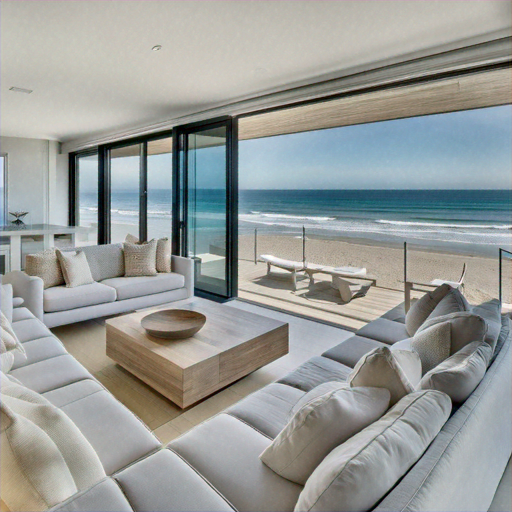

In [6]:
body = image_params.text_to_image(text="Modern, high-end beach house interior with panoramic views of the sand and sea, emphasizing sleek design and uncluttered spaces")
img = gen_image(body)

## Image Variation

Titan Image Generator는 기존 이미지를 가져와서 그 이미지를 기반으로 변형 이미지를 만들 수 있습니다. 원하는 요소가 포함된 이미지가 있지만 비슷한 특성을 가진 몇 가지 대체 옵션을 만들고자 할 때 유용합니다.


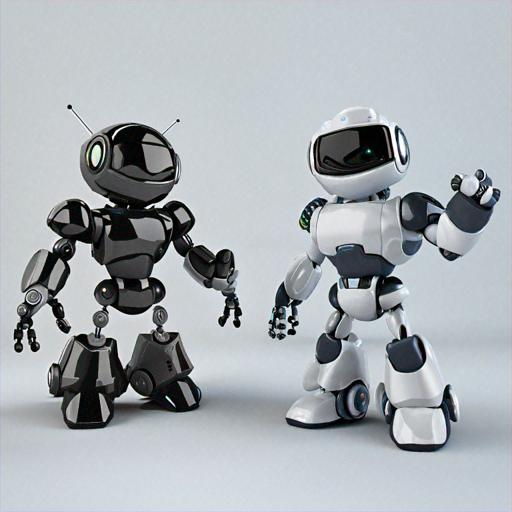


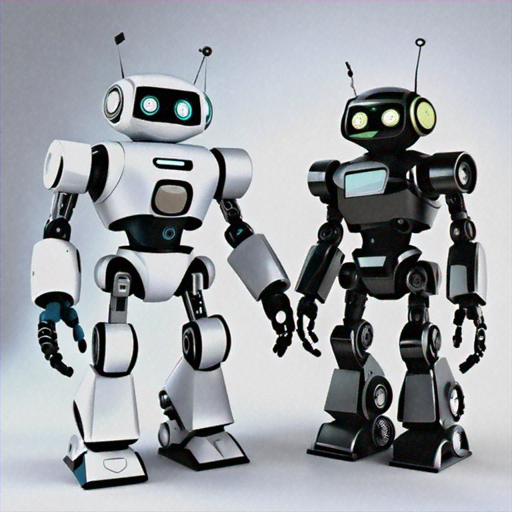

In [5]:
input = encode_image_base64_from_file('./data/robots.png')
display_image(input)

body = image_params.image_variant(
    images=[input],
    text="robots"
)
img = gen_image(body)

## Inpainting

이미지의 마스크 영역 내의 모든 픽셀을 다시 칠하는 프로세스입니다. 이미지 마스크를 사용하면 검은색 픽셀이 모두 다시 칠해집니다. 마스크 프롬프트를 사용하는 경우 마스크 프롬프트에 표시된 항목이 다시 칠해집니다.


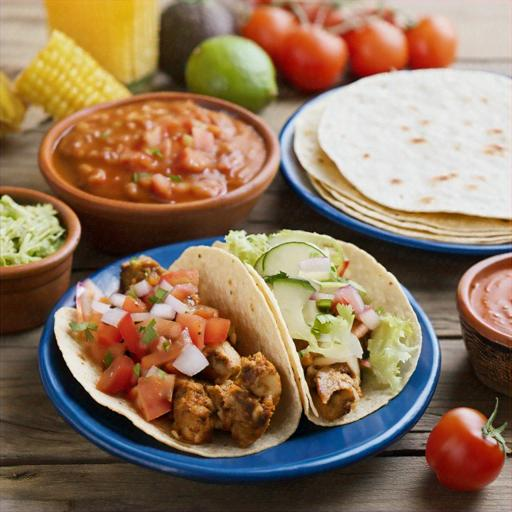


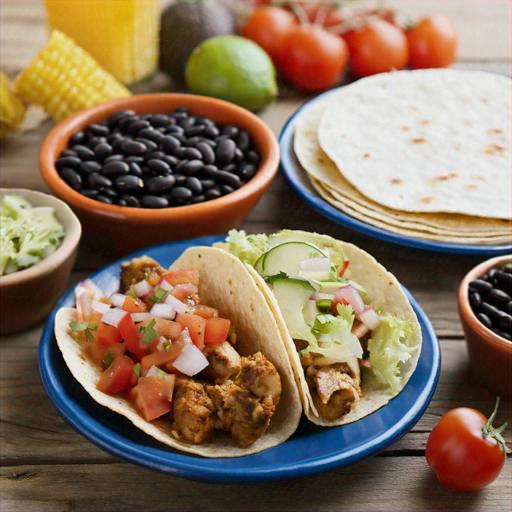

In [3]:
input = encode_image_base64_from_file('./data/food.png')
display_image(input)

body = image_params.inpainting(image=input,
                                mask_prompt="bowl of salsa",
                                text="bowl of black beans")
img = gen_image(body)

## Outpainting

이미지의 마스크 영역 외부의 모든 픽셀을 페인팅하는 프로세스입니다. 이미지 마스크를 사용하면 모든 흰색 픽셀이 다시 칠해집니다. 마스크 프롬프트를 사용하는 경우 마스크 프롬프트에 표시된 항목은 유지되고 그 외의 모든 항목은 다시 칠해집니다.


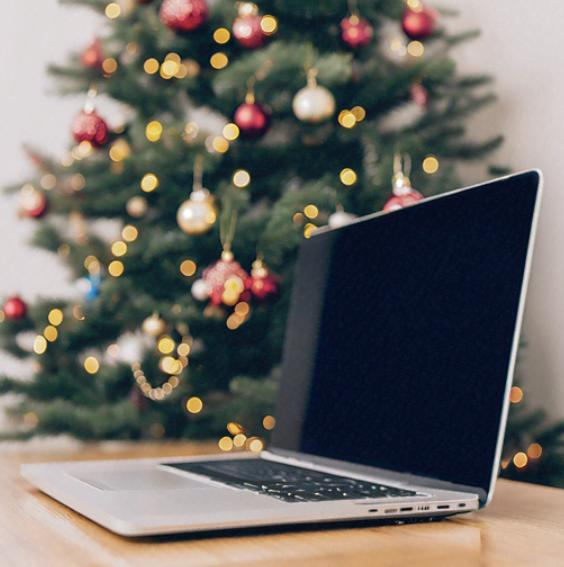


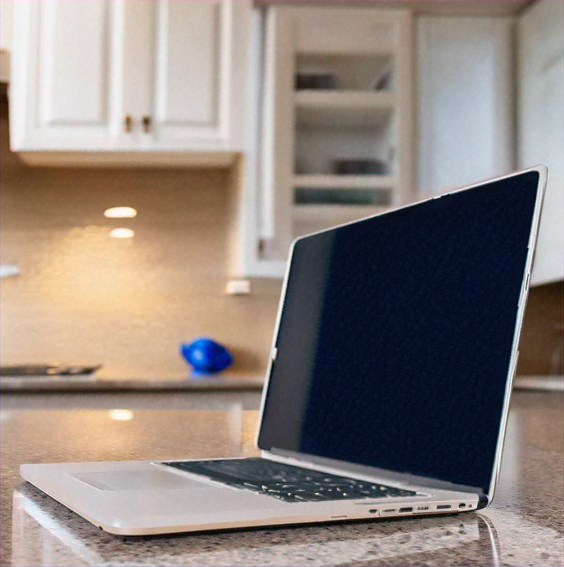

In [8]:
input = encode_image_base64_from_file('./data/laptop.png')
display_image(input)

body = image_params.outpainting(image=input,
                                mask_prompt="laptop",
                                text="laptop on a granite countertop")
img = gen_image(body)

## Image Conditioning

이미지 컨디셔닝 기능을 사용하여 의도적으로 정밀하게 작품의 모양을 만들 수 있습니다. 참조 이미지(즉, 컨디셔닝 이미지)를 제공하면 엣지, 객체 윤곽, 구조 요소 또는 참조 이미지 내 개별 영역 및 객체를 정의하는 분할 맵 등 구체적인 시각적 특성에 초점을 맞추도록 모델에 지시할 수 있습니다.

AWS는 캐니 엣지(Canny edge)와 세그먼트화라는 두 가지 유형의 이미지 컨디셔닝을 지원합니다.

- 캐니 엣지(Canny edge) 알고리즘을 사용하면 참조 이미지 내에서 눈에 띄는 엣지를 추출하여 Amazon Titan Image Generator가 생성 프로세스를 안내하는 데 사용할 수 있는 맵을 생성할 수 있으며, 원하는 이미지의 기초를 ‘그릴’ 수 있습니다. 그러면 모델이 사용자의 안내에 따라 세부 요소, 텍스처와 함께 최종적으로 미적 요소를 채웁니다.
- 세그먼트화(Segmentation)는 훨씬 더 세분화된 수준의 제어를 제공합니다. 참조 이미지를 제공하면 이미지 내 특정 영역 또는 객체를 정의할 수 있으며 정의된 리전에 맞는 콘텐츠를 생성하도록 Amazon Titan Image Generator에 지시할 수 있습니다. 캐릭터, 객체 및 기타 주요 요소의 배치와 렌더링을 정밀하게 제어할 수 있습니다.


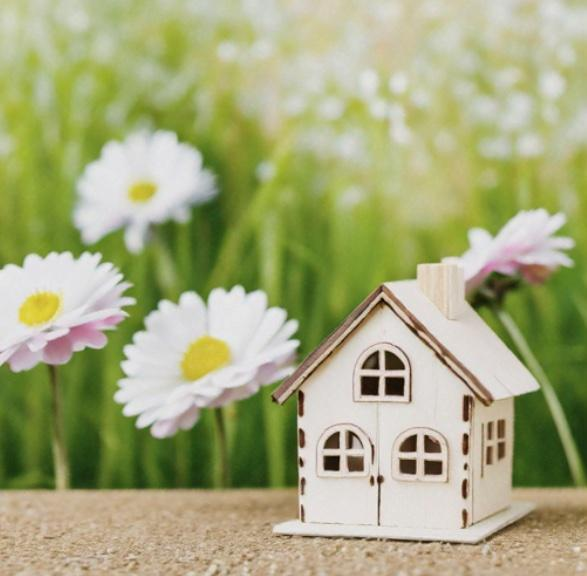


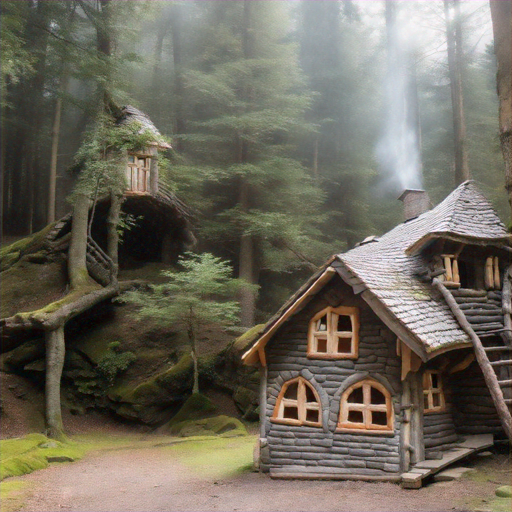

In [5]:
input_image = encode_image_base64_from_file('./data/house.jpg')
display_image(input_image)

body = image_params.text_to_image(text='A fairytale house in the forest', condition_image=input_image)
img = gen_image(body)

## Color Conditioning

대부분의 디자이너는 색상 브랜딩 가이드라인을 준수하는 이미지를 생성하고 싶어하므로 생성된 이미지의 색상 팔레트를 제어하려고 합니다.

Amazon Titan Image Generator v2를 사용하면 색상 브랜딩 가이드라인을 준수하는 입력의 일부로 제공되는 16진수 색상 목록인 색상 팔레트를 기준으로 하여 색상 컨디셔닝이 적용된 이미지를 생성할 수 있습니다. 또한 참조 이미지를 입력(선택 사항)으로 제공하여 참조 이미지에서 스타일을 상속하면서 제공된 16진수 색상으로 이미지를 생성할 수도 있습니다.


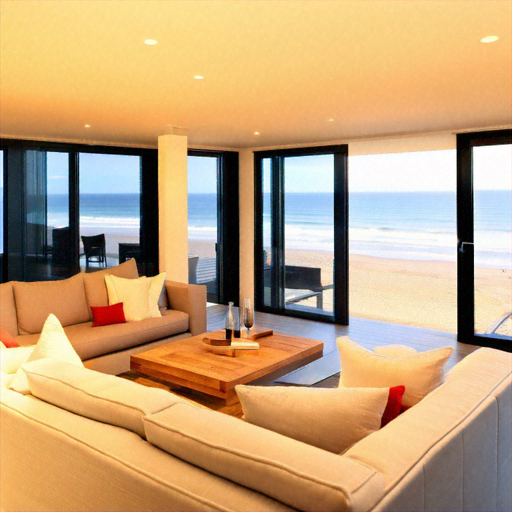

In [7]:
body = image_params.color_guide(
    text='Modern, high-end beach house interior with panoramic views of the sand and sea, emphasizing sleek design and uncluttered spaces',
    colors=['#ff8080', '#ffb280', '#ffe680', '#e5ff80']
)
img = gen_image(body)

## Background Removal

이미지를 단색 배경에 합성하거나 다른 장면 위에 레이어링하려는 경우, 배경을 깔끔하고 정확하게 제거하는 기능은 크리에이티브 워크플로에서 필수적인 도구입니다. 이미지에서 배경을 한 번에 즉시 제거할 수 있습니다. Amazon Titan Image Generator v2는 여러 전경 객체를 지능적으로 감지하고 세그먼트화할 수 있으므로 여러 요소가 겹치는 복잡한 장면도 깔끔하게 분리할 수 있습니다.


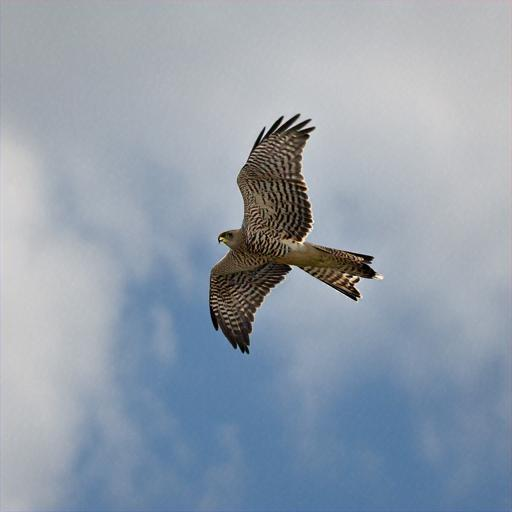


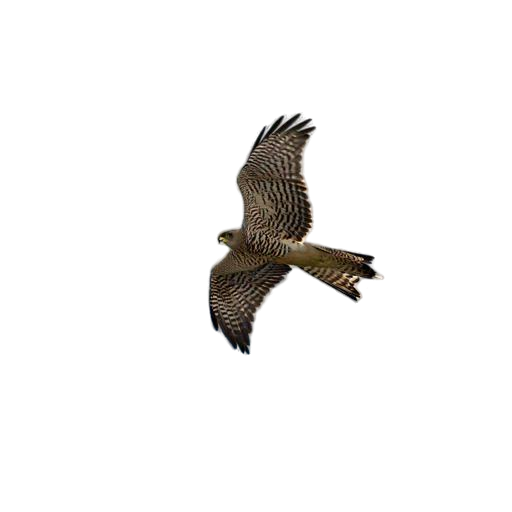

In [18]:
input = encode_image_base64_from_file('./data/falcon.png')
display_image(input)

body = image_params.background_removal(image=input)
img = gen_image(body)